<a href="https://colab.research.google.com/github/surajj22/Bike-Sharing-Demand-prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing modules and loading dataset** 

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the dataset
bike_df=pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project2 Seoul Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding ='latin')

## **Getting few information about the data**

In [4]:
#checking the top five row to take a glimpse of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#checking the bottom five row to take a glimpse of the data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [7]:
#Getting the shape of dataset
bike_df.shape

(8760, 14)

In [8]:
#checking info about the data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [9]:
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [10]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [11]:
bike_df.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

In [12]:
#checking for null values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [13]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print(value)

0


**After checking for the missing and duplicate values we came to know that we don't have any missing and duplicate values.**

In [14]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)



*   we convert the "date" column into 3 different column i.e "year","month","day".
*   The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.

*   The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column. 

In [16]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [17]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [18]:
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [19]:
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [21]:
#Changing the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

# **Exploratory Data Analysis of the Dataset**

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

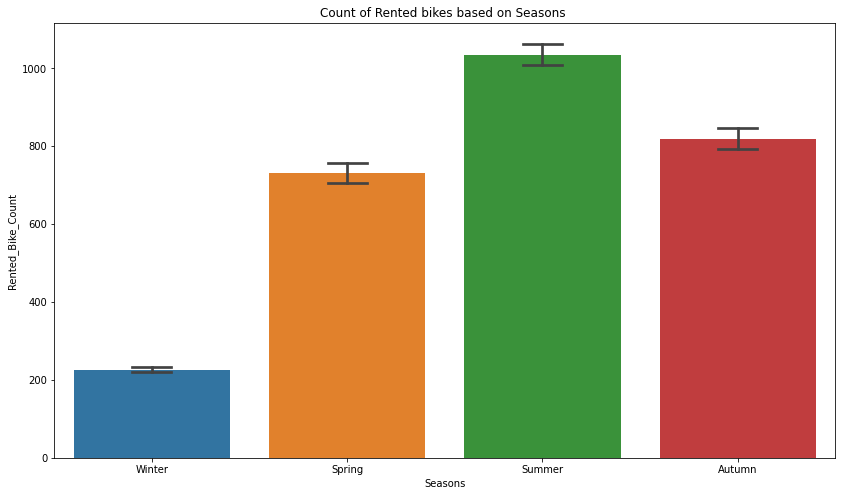

In [23]:
#anlysis of data by vizualisation using seasons and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on Seasons ')

***The above plot shows that in summer season the use of rented bike is high whereas in winter season the use of rented bike is very low.***

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

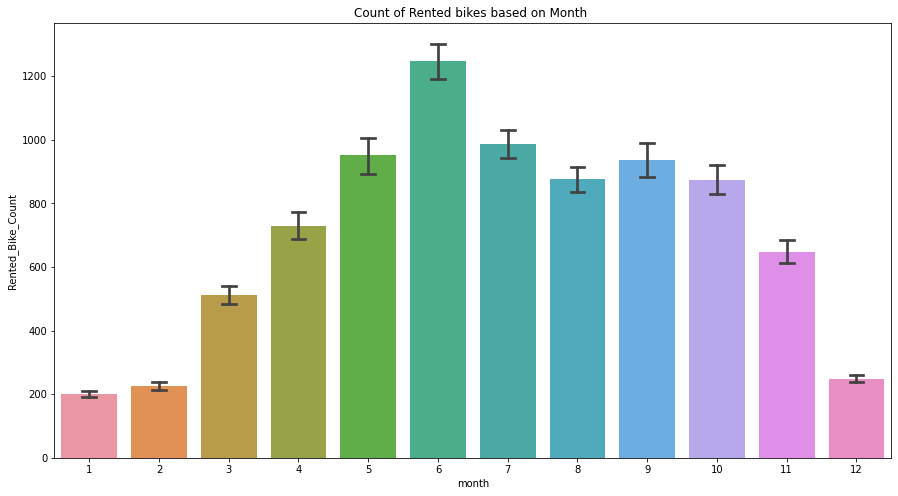

In [24]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on Month ')

***The above bar plot clearly shows that from the month 5 to 10 the demand of the rented bike is high as compare to other months.***

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

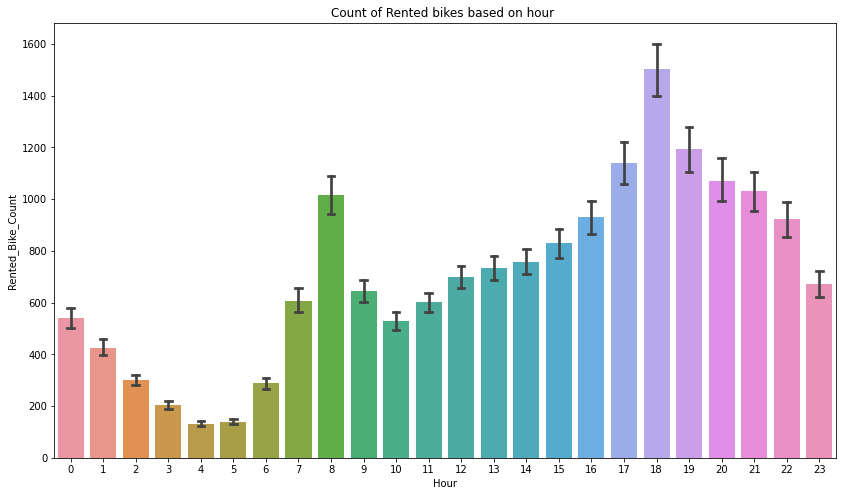

In [25]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on hour ')

***The above plot clearly shows that people generally use rented bikes during their working hour from 7am to 9am and 5pm to 8pm.***

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

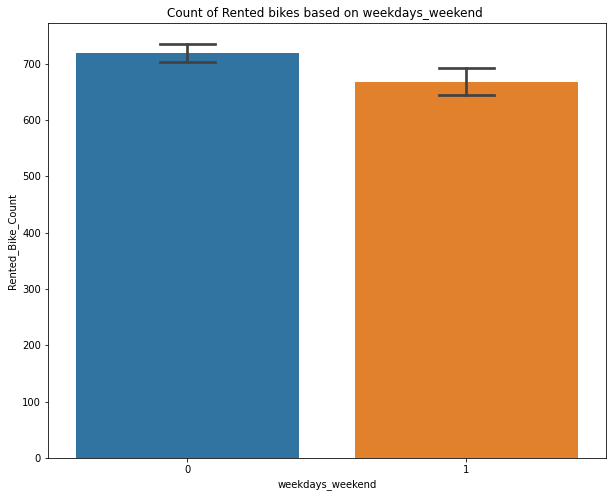

In [26]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

***The above plot shows that in the week days which is in blue colur tells that the demand of the bike is higher because of the office as compare to the weekend.***

[Text(0.5, 1.0, 'Count of Rented bikes based on Functioning_Day ')]

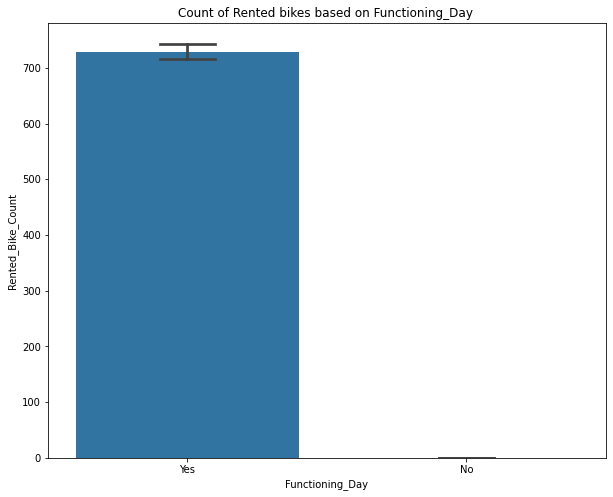

In [27]:
#anlysis of data by vizualisation using functioning day and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on Functioning_Day ')

***The above plot shows that people use rented bike only in functioning day.***

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

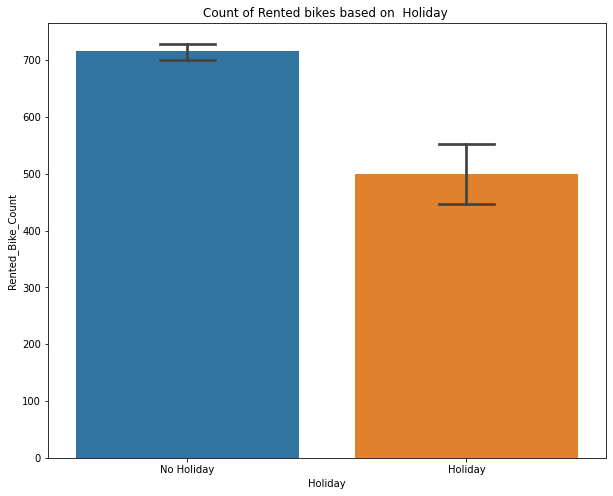

In [28]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on  Holiday ')

***The above plot shows that use of rented bike is more on no holiday as compare to holiday.***

## **Visualizing Distributions**

***Visualizing numerical variables distplot***

In [29]:
#assigning numerical coulmn to variable
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

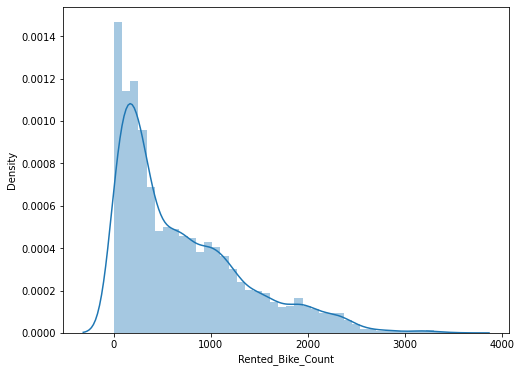

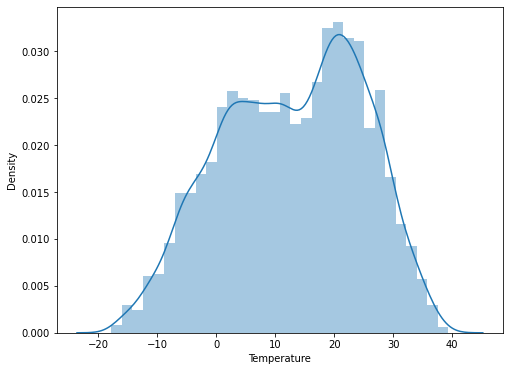

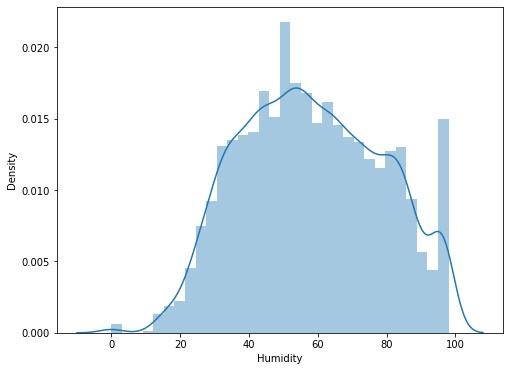

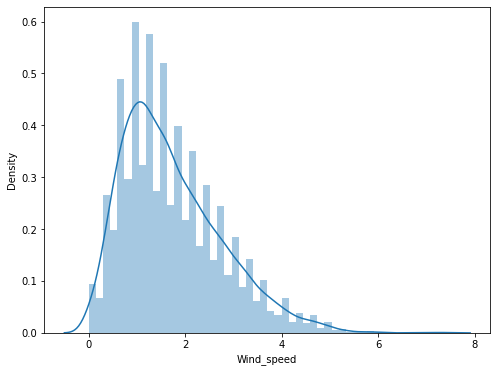

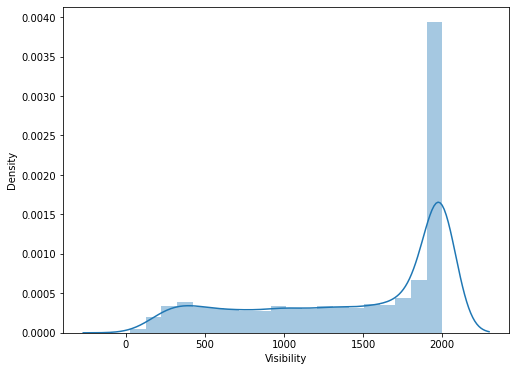

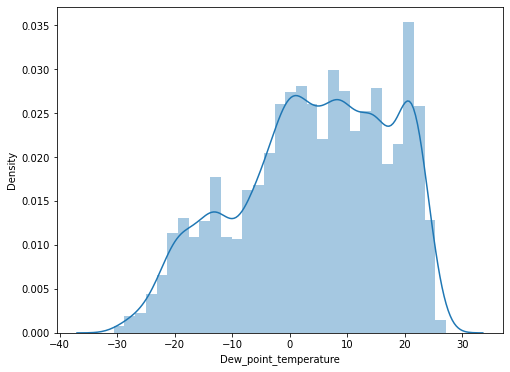

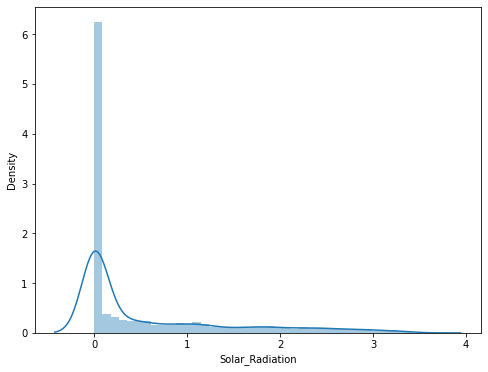

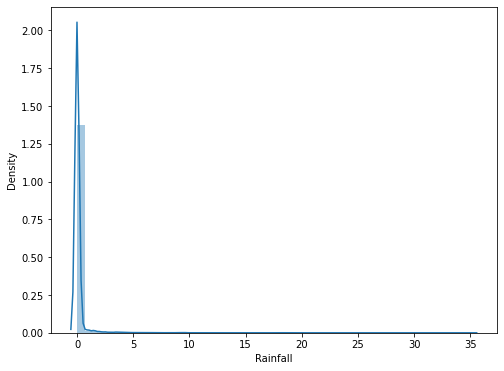

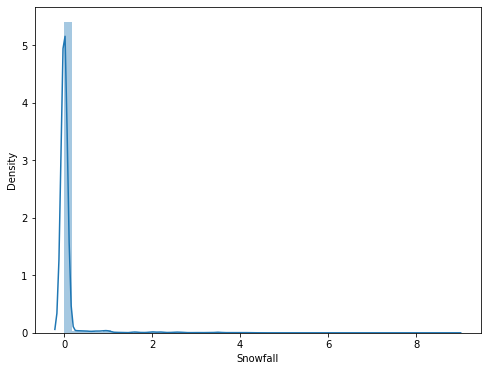

In [30]:
#plotting distplots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(8,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

***From the above plots we see that some of them are rightly skewed and some are leftly skewed.***

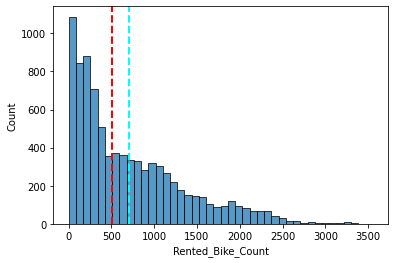

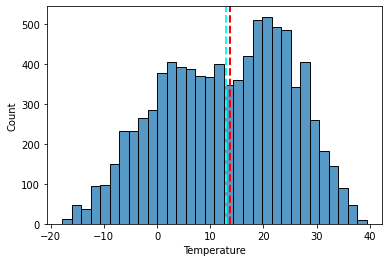

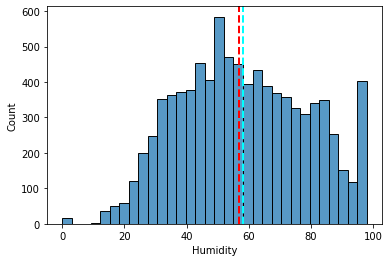

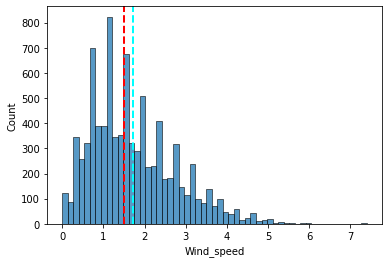

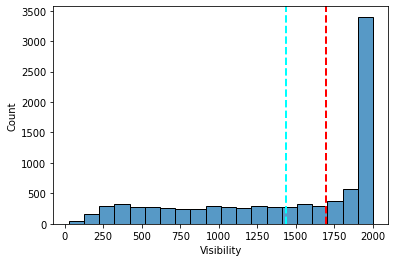

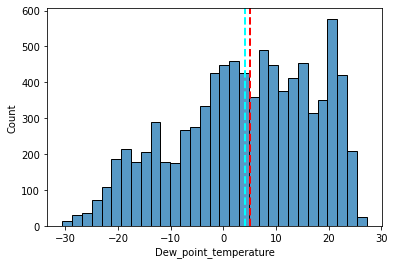

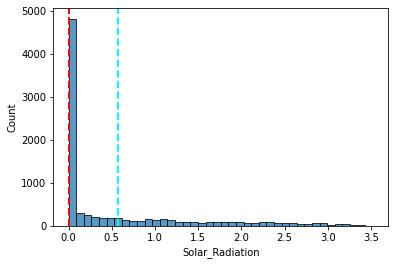

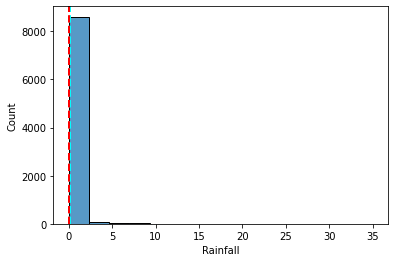

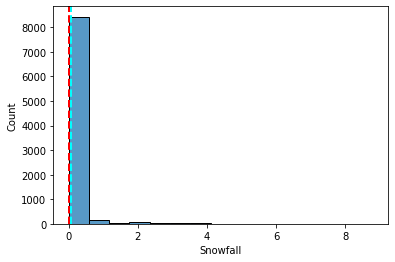

In [31]:
#plotting histogram with mean and median

for col in numerical_features[:]:
  sns.histplot(bike_df[col])
  plt.axvline(bike_df[col].mean(), color='cyan', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

***From Histplots we can conclude that the features which are skewed, their mean and the median are also skewed.***

# **Regression plotting**

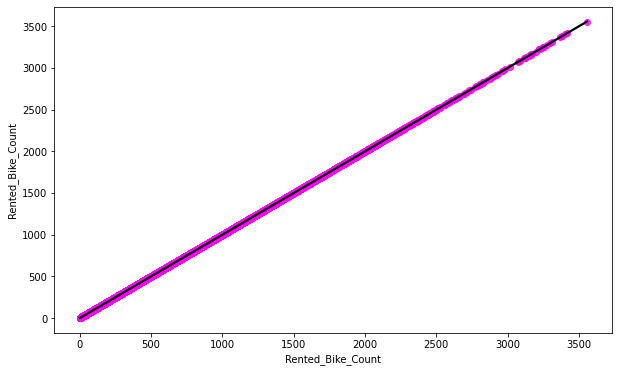

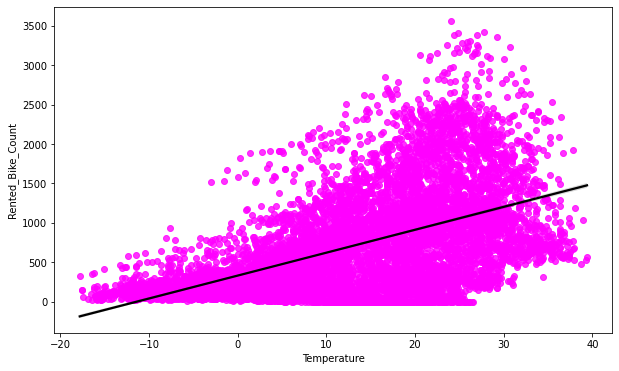

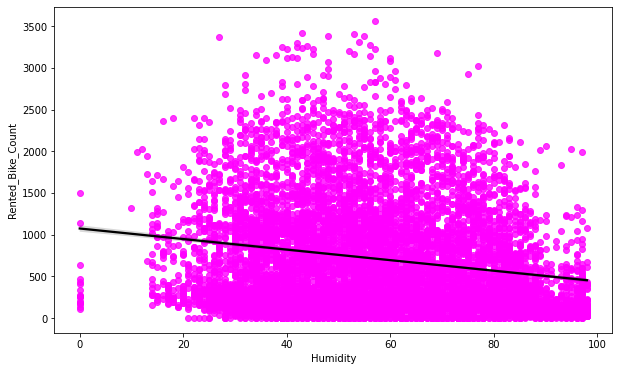

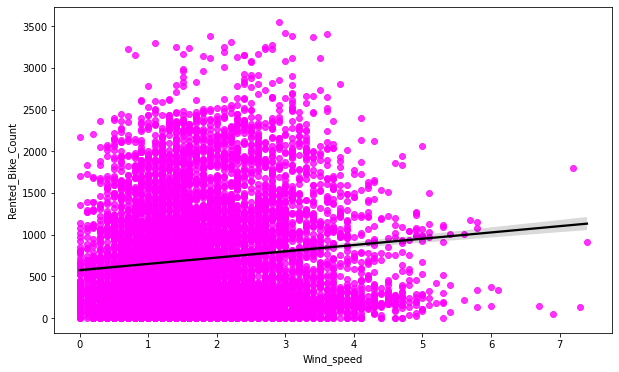

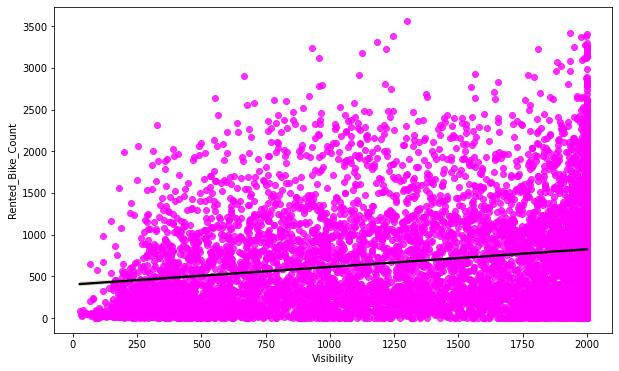

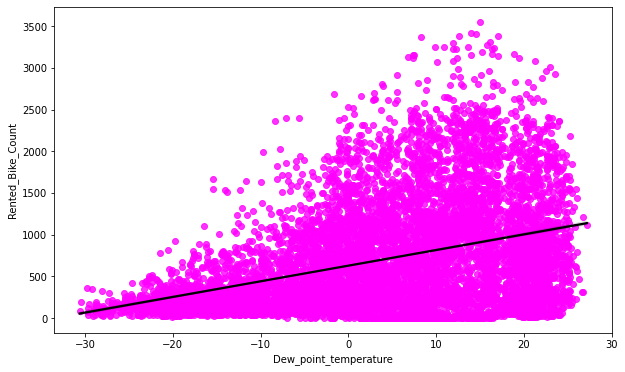

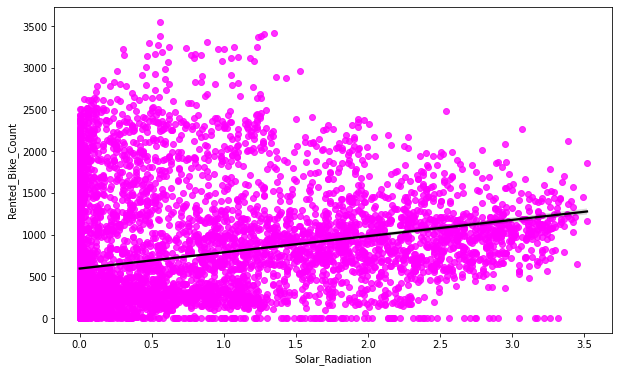

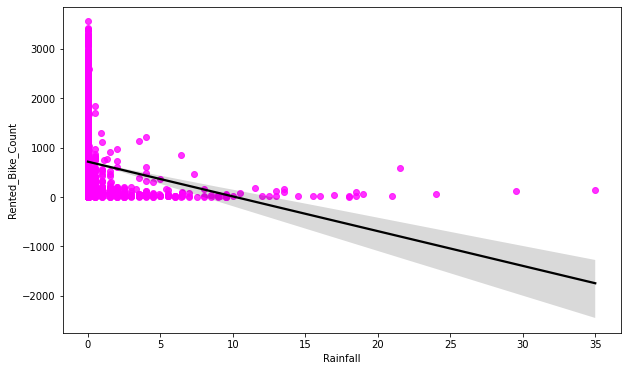

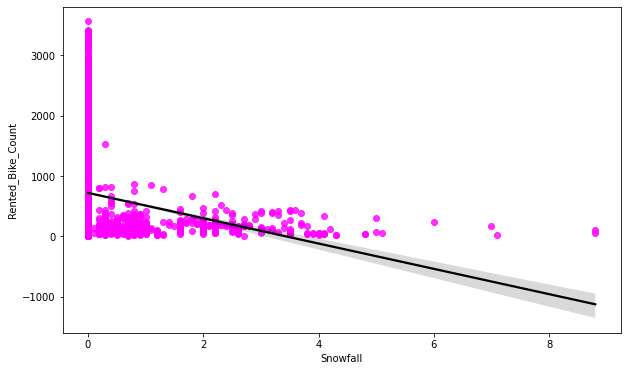

In [32]:
#plotting the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'magenta'}, line_kws={"color": "black"})

***From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature'and 'Solar_Radiation' are positively related to the dependent variable.
which means that the rented bike count increases with increase of these features.***

***Whereas, 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable which means that the rented bike count decreases when these features increases.***

## **Normalised Rented_Bike_Count column data.**

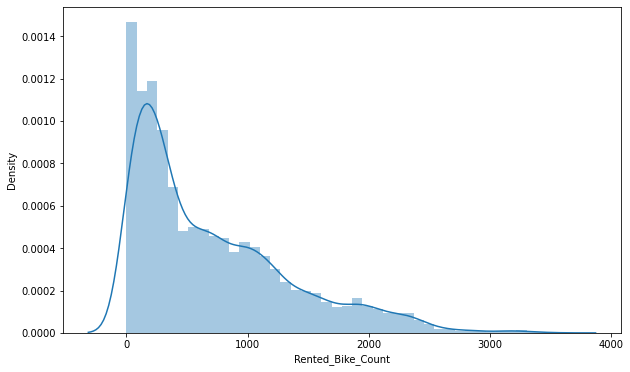

In [33]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(bike_df['Rented_Bike_Count'])

***The above graph shows that Rented Bike Count has moderate right skewness. And we know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, so we should perform some operation to make it normal.***

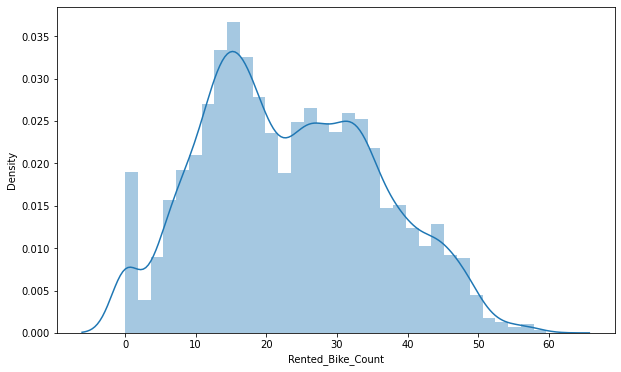

In [34]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']))

***After applying Square root to the skewed Rented Bike Count, we get almost normal distribution.***

# **Checking correletion betweeen variables using Correlation heatmap.**

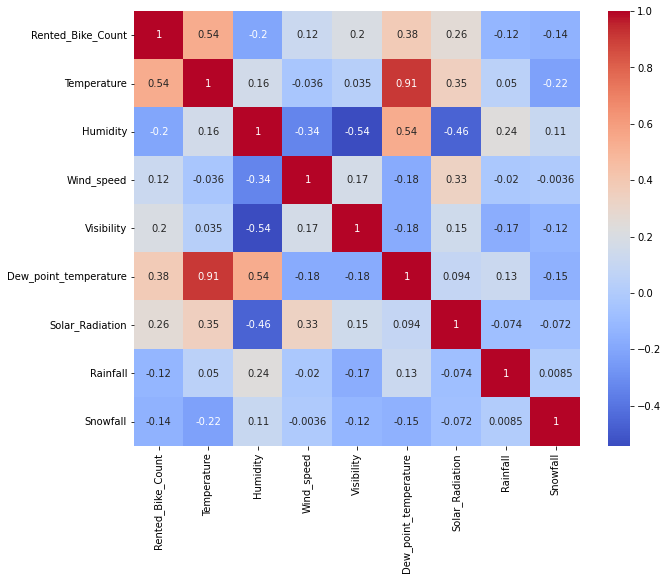

In [35]:
#plotting correlation graph
plt.figure(figsize=(10,8))
sns.heatmap(bike_df.corr(),annot=True,cmap='coolwarm')

***From the above correlation graph we get to know that some features are positively correlated with target variable and some are negatively correlated.***

***And it also shows that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affect the outcome of our analysis. so we can drop the column 'Dew point temperature(°C)'.***

In [36]:
#droping the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [37]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


## **Creating dummy variable and doing one hot encoding.**

In [38]:
# Using Pandas get Dummies for Encoding categorical features
new_bike_df=pd.get_dummies(bike_df,drop_first=True,sparse=True)

In [39]:
new_bike_df.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Model Training**

## **Train Test split for regression**

In [40]:
#Assigning the value in X and Y
X = new_bike_df.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(new_bike_df['Rented_Bike_Count'])

In [41]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

# **Implementing Linear Regression**

In [43]:
#Creating test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [44]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [45]:
#checking the score
reg.score(X_train, y_train)

0.7722101548255267

In [46]:
#checking the coefficeint
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [47]:
#getting the X_train
y_pred_train=reg.predict(X_train)

In [48]:
#importing package
from sklearn.metrics import mean_squared_error

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07751288189293
RMSE : 5.9226271942350825
MAE : 4.474024092996787
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


***Here r2 score value is 0.77 that means our model is able to capture most of the data variance.*** 

In [49]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [50]:
#getting the X-test value
y_pred_test=reg.predict(X_test)

In [51]:
#importing package
from sklearn.metrics import mean_squared_error

#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2)


MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318181
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


***The r2_score for the test set is 0.78, it means that our linear model is performing well on the data.***

In [52]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

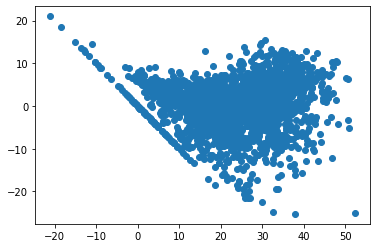

In [53]:
#Checking Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

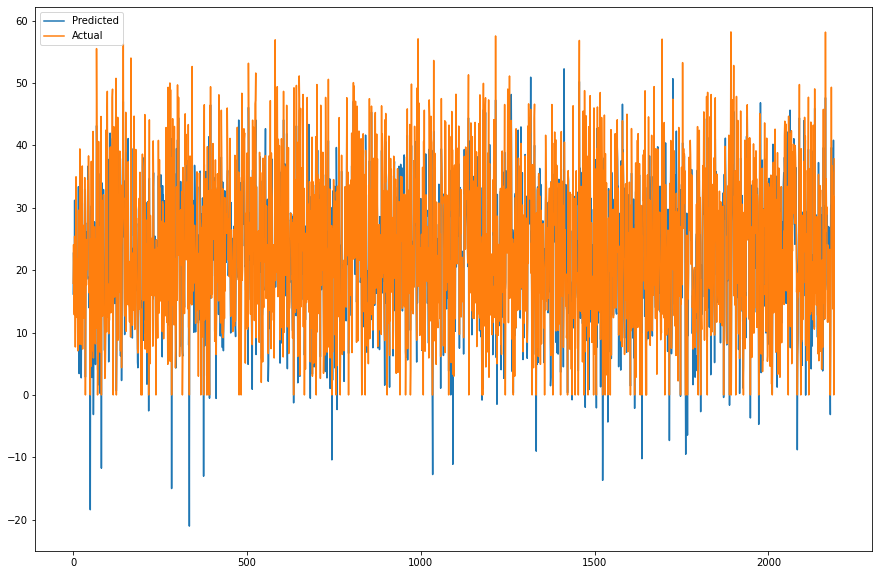

In [54]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Lasso regression**

In [55]:
#Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.3873692800799008
0.40519624904934015


In [56]:
#getting the X_train value
y_pred_train_lasso=lasso.predict(X_train)

In [57]:
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


***Here r2 score is 0.40 so it means that our model is not able to capture most of the data variance.***

In [58]:
# storinging the metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [60]:
#get the X-test value
y_pred_test_lasso=lasso.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


***The r2_score for the test set is 0.38 it means that our linear model is not performing well on the data.***

In [62]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

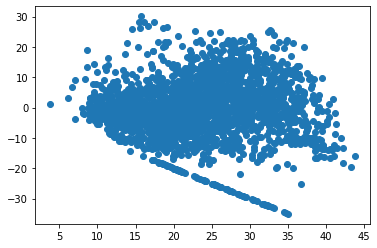

In [63]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

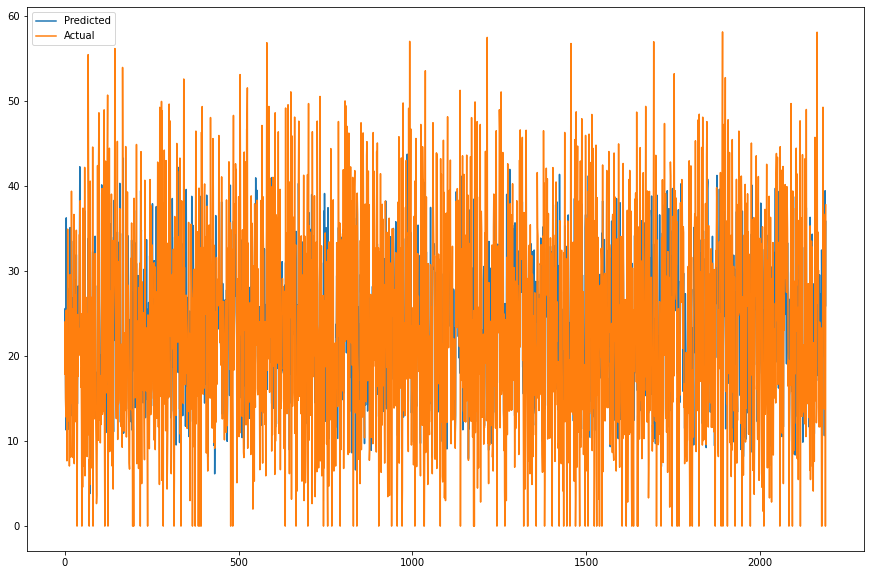

In [64]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Ridge Regression**